# Imports

In [1]:
import matplotlib.pyplot as plt
import tkinter
import numpy as np
import pandas as pd

# Inputs do usuário:

In [2]:
#conjunto de dados que vão poder ser inseridos pelo usuário
x = int(input("Qual a largura da placa?: "))#40 # comprimento da barra
y =  int(input("Qual a altura da placa?: ")) #40 #largura da barra
deltaX = int(input("Qual o espaçamento das divisões da largura da placa?: "))
deltaY= int(input("Qual o espaçamento das divisões da altura da placa?: "))
tempInicial =  int(input("Qual a temperatura inical dos pontos internos da placa da placa?: "))
deltaTempo = float(input("Uma iteração corresponde à quantos segundos? "))  #10**-3
ct = float(input("Qual a condutividade térmica do material?: ")) #0.23
ce = float(input("Qual o calor especifico do material?: ")) #897
density = float(input("Qual a densidade do material?: ")) #2.7 * 10**-6
alfa = ct/(ce*density) #9.4967 * 10**(-5)
isByTime = int(input("Deseja limitar o programa por tempo ou pelo maior erro admissível? (1 se por tempo e 0 se por erro) : "))
if isByTime:
    maxTimeCalculating = int(input("Qual o tempo limite de execução do programa?: "))#10 #in seconds (só deveria ser pedido para usuario, se o isByTime for True)
else :
    toleranciaAdmissivel = int(input("Qual o maior erro aceitável?: ")) #0.005 # só deveria ser pedido para usuario, se o isByTime for False
whichBorders =  input("Quais bordas possuem condições de contorno? (use 1 para a da esquerda, 2 para o topo, 3 para a da direita e 4 para a de baixo. Separe os números com virgula) :")
whichBorders = whichBorders.split(',')
newWhichBorders = [] # numbers from 1 to 4
for i in range(1,5):
    if(str(i) in whichBorders):
        newWhichBorders.append(i)
    else:
        newWhichBorders.append(None)
whichBorders = newWhichBorders
bordersFlowValue = []
bordersNameList = ['esquerda', 'superior', 'direita', 'inferior']
for i in whichBorders:
    if (i != None):
        temp = int(input("Qual a taxa de condução para a borda  {0}? ".format(bordersNameList[i-1])))
        bordersFlowValue.append(temp)
    else:
        bordersFlowValue.append(None)
temperaturesBorder= [None,None,None,None]
for i in range(0,4):
    temp  = int(input("Qual a temperatura inicial da borda {0}?".format(bordersNameList[i])))
    temperaturesBorder[i] = temp

Qual a largura da placa?: 40
Qual a altura da placa?: 40
Quantas divisões deseja ter na altura da placa?: 8
Quantas divisões deseja ter na largura da placa?: 8
Qual a temperatura inical dos pontos internos da placa da placa?: 0
Uma iteração corresponde à quantos segundos? 0.001
Qual a condutividade térmica do material?: 0.23
Qual o calor especifico do material?: 897
Qual a densidade do material?: 0.0000027
Deseja limitar o programa por tempo ou pelo maior erro admissível? (1 se por tempo e 0 se por erro) : 1
Qual o tempo limite de execução do programa?: 10
Quais bordas possuem condições de contorno? (use 1 para a da esquerda, 2 para o topo, 3 para a da direita e 4 para a de baixo. Separe os números com virgula) :1
Qual a taxa de condução para a borda  esquerda? 0
Qual a temperatura inicial da borda esquerda?0
Qual a temperatura inicial da borda superior?150
Qual a temperatura inicial da borda direita?50
Qual a temperatura inicial da borda inferior?0


# Cálculos

In [3]:
# tamanho de divisões na placa para cada eixo
xPointsLength = int(x/deltaX)
yPointsLength = int(y/deltaY)


def isIntern(i,j):
    localX = (i == 0) or (i == xPointsLength-1)
    localY = (j == 0) or (j == yPointsLength-1)
    return not (localX or localY)

def isVertix(i,j):
    return (i==0 and j==0) or (i==0 and j==yPointsLength-1)  or (i==xPointsLength-1 and j==0) or (i==xPointsLength-1 and j==yPointsLength-1)

# código que forma  a matriz no tempo 0
matrizDeTemp = []
tolerancias = []
print("Creating inital matrix...")
for i in range(0,xPointsLength):
    oordenadas = [];
    tols = []
    # existe essas condições pois as bordas possuem valores diferentes de temperatura
    for j in range(0, yPointsLength):
        if i == 0:
            oordenadas.append(temperaturesBorder[1])
            tols.append(0);
        elif i == (xPointsLength - 1):
            oordenadas.append(temperaturesBorder[3])
            tols.append(0);
        elif j == 0:
            oordenadas.append(temperaturesBorder[0])
            tols.append(0);
        elif j == (yPointsLength - 1):
            oordenadas.append(temperaturesBorder[2])
            tols.append(0);
        else:
            oordenadas.append(tempInicial)
            tols.append(float('inf'));
    matrizDeTemp.append(oordenadas)
    tolerancias.append(tols)
print("Created")

# cada interação do while é um  deltaTempo (segundos) que passou
Fo = alfa * deltaTempo / deltaX**2
print("Iterating though time...")
time = 0
condition = True #condição de parada do loop
while(condition):
    maiorTolerancia = 0
    for i in range(0, len(matrizDeTemp)):
        for j in range(0, len(matrizDeTemp[i])):
            tempvelha = matrizDeTemp[i][j]
            #aqui nessa parte tive de converter essa expressão para float128 pq eram números tão pequenos que não
            #cabiam em 64 bits
            if(isIntern(i,j)):
                matrizDeTemp[i][j] = np.float128(Fo * (matrizDeTemp[i+1][j] + matrizDeTemp[i-1][j] + matrizDeTemp[i][j+1] + matrizDeTemp[i][j-1])) + (1 - 4*Fo)*matrizDeTemp[i][j]
            else: 
                if((j==0 and 1 in whichBorders) and (i != 0 and i != xPointsLength-1)):
                     matrizDeTemp[i][j] = np.float128(Fo * (matrizDeTemp[i+1][j] + 2*deltaX*bordersFlowValue[0] + matrizDeTemp[i][j+1] + matrizDeTemp[i][j-1])) + (1 - 4*Fo)*matrizDeTemp[i][j]

                elif((j==yPointsLength-1 and 3 in whichBorders) and (i != 0 and i != xPointsLength-1)):
                     matrizDeTemp[i][j] = np.float128(Fo * (2*deltaX*bordersFlowValue[2] + matrizDeTemp[i-1][j] + matrizDeTemp[i][j+1] + matrizDeTemp[i][j-1])) + (1 - 4*Fo)*matrizDeTemp[i][j]

                elif((i==0 and 4 in whichBorders) and (j != 0 and j != yPointsLength-1)):
                     matrizDeTemp[i][j] = np.float128(Fo * (matrizDeTemp[i+1][j] + matrizDeTemp[i-1][j] + matrizDeTemp[i][j+1] + 2*deltaY*bordersFlowValue[3])) + (1 - 4*Fo)*matrizDeTemp[i][j]

                elif((i==xPointsLength-1 and 2 in whichBorders) and (j != 0 and j != yPointsLength-1)):
                     matrizDeTemp[i][j] = np.float128(Fo * (matrizDeTemp[i-1][j] + matrizDeTemp[i-1][j] +  2*deltaY*bordersFlowValue[1] + matrizDeTemp[i][j-1])) + (1 - 4*Fo)*matrizDeTemp[i][j]
            if(not isVertix(i,j)):
                tempnova = matrizDeTemp[i][j]
                if(tempnova != 0):
                     erro = np.absolute((tempvelha - tempnova) / tempnova)
                else:
                    erro =np.absolute(tempvelha - tempnova)

                if(erro > maiorTolerancia):
                    maiorTolerancia = erro
            
    time+=1
    if(isByTime):
        if (time*deltaTempo > maxTimeCalculating):
            condition = False
    else:
        condition = maiorTolerancia > tolerânciaAdmissivel
    


print("Matrix answer: ")
print("\n")
print("Time elapsed: {0} segundos".format(time*deltaTempo))
print("Error: {0}".format(maiorTolerancia))


Creating inital matrix...
Created
Iterating though time...
Matrix answer: 


Time elapsed: 10.001 segundos
Error: 5.657584246855825e-10


# Tabela de Distribuição de temperatura ao longo da placa

In [4]:
dataFrame = pd.DataFrame(matrizDeTemp)
dataFrame

,0,1,2,3,4
0,150.000000,150.000000,150.000000,150.000000,150
1,40.681474,83.475843,94.711748,88.016694,50
2,29.250057,48.510160,57.354465,57.355035,50
3,18.490071,23.960289,28.840934,34.048990,50
4,0.000000,0.000000,0.000000,0.000000,0


# Gŕafico de tempo de execução X Tamanho da malha

Creating inital matrix...
Created
Iterating though time...
Creating inital matrix...
Created
Iterating though time...
Creating inital matrix...
Created
Iterating though time...
Creating inital matrix...
Created
Iterating though time...
Creating inital matrix...
Created
Iterating though time...
Creating inital matrix...
Created
Iterating though time...
Creating inital matrix...
Created
Iterating though time...
Creating inital matrix...
Created
Iterating though time...
Creating inital matrix...
Created
Iterating though time...


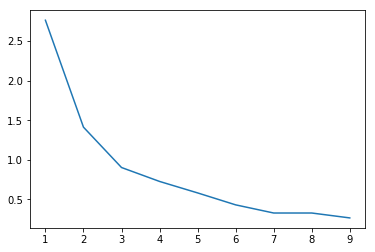

In [6]:
divisoes = []
tempos = []
isByTime = False
toleranciaAdmissivel = 0.005
for delta in range(1,10):
    # tamanho de divisões na placa para cada eixo
    xPointsLength = int(x/delta)
    yPointsLength = int(y/delta)


    def isIntern(i,j):
        localX = (i == 0) or (i == xPointsLength-1)
        localY = (j == 0) or (j == yPointsLength-1)
        return not (localX or localY)

    def isVertix(i,j):
        return (i==0 and j==0) or (i==0 and j==yPointsLength-1)  or (i==xPointsLength-1 and j==0) or (i==xPointsLength-1 and j==yPointsLength-1)

    # código que forma  a matriz no tempo 0
    matrizDeTemp = []
    tolerancias = []
    print("Creating inital matrix...")
    for i in range(0,xPointsLength):
        oordenadas = [];
        tols = []
        # existe essas condições pois as bordas possuem valores diferentes de temperatura
        for j in range(0, yPointsLength):
            if i == 0:
                oordenadas.append(temperaturesBorder[1])
                tols.append(0);
            elif i == (xPointsLength - 1):
                oordenadas.append(temperaturesBorder[3])
                tols.append(0);
            elif j == 0:
                oordenadas.append(temperaturesBorder[0])
                tols.append(0);
            elif j == (yPointsLength - 1):
                oordenadas.append(temperaturesBorder[2])
                tols.append(0);
            else:
                oordenadas.append(tempInicial)
                tols.append(float('inf'));
        matrizDeTemp.append(oordenadas)
        tolerancias.append(tols)
    print("Created")

    # cada interação do while é um  deltaTempo (segundos) que passou
    Fo = alfa * deltaTempo / deltaX**2
    print("Iterating though time...")
    time = 0
    condition = True #condição de parada do loop
    while(condition):
        maiorTolerancia = 0
        for i in range(0, len(matrizDeTemp)):
            for j in range(0, len(matrizDeTemp[i])):
                tempvelha = matrizDeTemp[i][j]
                #aqui nessa parte tive de converter essa expressão para float128 pq eram números tão pequenos que não
                #cabiam em 64 bits
                if(isIntern(i,j)):
                    matrizDeTemp[i][j] = np.float128(Fo * (matrizDeTemp[i+1][j] + matrizDeTemp[i-1][j] + matrizDeTemp[i][j+1] + matrizDeTemp[i][j-1])) + (1 - 4*Fo)*matrizDeTemp[i][j]
                else: 
                    if((j==0 and 1 in whichBorders) and (i != 0 and i != xPointsLength-1)):
                         matrizDeTemp[i][j] = np.float128(Fo * (matrizDeTemp[i+1][j] + 2*deltaX*bordersFlowValue[0] + matrizDeTemp[i][j+1] + matrizDeTemp[i][j-1])) + (1 - 4*Fo)*matrizDeTemp[i][j]

                    elif((j==yPointsLength-1 and 3 in whichBorders) and (i != 0 and i != xPointsLength-1)):
                         matrizDeTemp[i][j] = np.float128(Fo * (2*deltaX*bordersFlowValue[2] + matrizDeTemp[i-1][j] + matrizDeTemp[i][j+1] + matrizDeTemp[i][j-1])) + (1 - 4*Fo)*matrizDeTemp[i][j]

                    elif((i==0 and 4 in whichBorders) and (j != 0 and j != yPointsLength-1)):
                         matrizDeTemp[i][j] = np.float128(Fo * (matrizDeTemp[i+1][j] + matrizDeTemp[i-1][j] + matrizDeTemp[i][j+1] + 2*deltaY*bordersFlowValue[3])) + (1 - 4*Fo)*matrizDeTemp[i][j]

                    elif((i==xPointsLength-1 and 2 in whichBorders) and (j != 0 and j != yPointsLength-1)):
                         matrizDeTemp[i][j] = np.float128(Fo * (matrizDeTemp[i-1][j] + matrizDeTemp[i-1][j] +  2*deltaY*bordersFlowValue[1] + matrizDeTemp[i][j-1])) + (1 - 4*Fo)*matrizDeTemp[i][j]
                if(not isVertix(i,j)):
                    tempnova = matrizDeTemp[i][j]
                    if(tempnova != 0):
                         erro = np.absolute((tempvelha - tempnova) / tempnova)
                    else:
                        erro =np.absolute(tempvelha - tempnova)

                    if(erro > maiorTolerancia):
                        maiorTolerancia = erro

        time+=1
        if(isByTime):
            if (time*deltaTempo > maxTimeCalculating):
                condition = False
        else:
            condition = maiorTolerancia > toleranciaAdmissivel
    divisoes.append(delta)
    tempos.append(time*deltaTempo)
    
plt.plot(divisoes, tempos)
plt.show()
plt.title("Tamanho das divisões em CM X Tempo de execução")